In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

In [2]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import learning_curve

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

In [4]:
folder = "D:/Openclassrooms_DataScientist/Projet_3/donnees/"

In [5]:
df = pd.read_csv(folder+'data_2.csv', index_col=0)
df.head()

,Quartier,AgeBatiment,NombreUtilisations,PremierTypePropriete,NombreBatiments,NombreEtages,SurfacePlancherTotal,SurfaceTotaleParking,SurfaceTotaleHorsParking,ListeUtilisationsBatiment,UtilisationPrincipale,SurfaceUtilisationPrincipale,UtilisationSecondaire,SurfaceUtilisationSecondaire,UtilisationTertiaire,SurfaceUtilisationTertiaire,Conformité,ConsoSite/S(kBtu/sf),ConsoSiteNorm/S(kBtu/sf),ConsoSource/S(kBtu/sf),ConsoSourceNorm/S(kBtu/sf),ConsoSiteTot(kBtu),ConsoSiteTotNorm(kBtu),Vapeur(kBtu),Électricité(kBtu),GazNaturel(kBtu),EmissionGES,IntensiteGES/S,TrancheAge,Pertes/S(kBtu/sf),ProportionVapeur,ProportionElectricité,ProportionGazNaturel
0,DOWNTOWN,89,1,Hotel,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,Aucune,0.0,Aucune,0.0,Compliant,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83,"[87,116[",100.800003,0.277302,0.546060,0.176638
1,DOWNTOWN,20,3,Hotel,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,Compliant,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,3242851.0,5145082.0,295.86,2.86,"[0,29[",81.300003,0.000000,0.386609,0.613391
2,DOWNTOWN,47,1,Hotel,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,Aucune,0.0,Aucune,0.0,Compliant,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,49526664.0,1493800.0,2089.28,2.19,"[29,58[",145.899994,0.297113,0.682307,0.020579
3,DOWNTOWN,90,1,Hotel,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,Aucune,0.0,Aucune,0.0,Compliant,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67,"[87,116[",105.399994,0.325913,0.407519,0.266567
4,DOWNTOWN,36,3,Hotel,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,Compliant,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,5368607.0,8803998.0,505.01,2.88,"[29,58[",96.599991,0.000000,0.378802,0.621198


Etapes : 

- choix des modèles à utiliser
- choix des colonnes
- encodage
- choix des variables : feature selection
- standardisation (2e iter)
- entrainement
- optimisation avec GridSearchCV
- evaluation : score, learning curve

In [6]:
df.columns

Index(['Quartier', 'AgeBatiment', 'NombreUtilisations', 'PremierTypePropriete',
       'NombreBatiments', 'NombreEtages', 'SurfacePlancherTotal',
       'SurfaceTotaleParking', 'SurfaceTotaleHorsParking',
       'ListeUtilisationsBatiment', 'UtilisationPrincipale',
       'SurfaceUtilisationPrincipale', 'UtilisationSecondaire',
       'SurfaceUtilisationSecondaire', 'UtilisationTertiaire',
       'SurfaceUtilisationTertiaire', 'Conformité', 'ConsoSite/S(kBtu/sf)',
       'ConsoSiteNorm/S(kBtu/sf)', 'ConsoSource/S(kBtu/sf)',
       'ConsoSourceNorm/S(kBtu/sf)', 'ConsoSiteTot(kBtu)',
       'ConsoSiteTotNorm(kBtu)', 'Vapeur(kBtu)', 'Électricité(kBtu)',
       'GazNaturel(kBtu)', 'EmissionGES', 'IntensiteGES/S', 'TrancheAge',
       'Pertes/S(kBtu/sf)', 'ProportionVapeur', 'ProportionElectricité',
       'ProportionGazNaturel'],
      dtype='object')

## Choix de mes variables

Mon modèle est un modèle de régression qui consiste à déterminer les consommations au m² des bâtiments en fonction de leur caractéristiques.

In [7]:
data = df[['Quartier', 'AgeBatiment', 'NombreUtilisations', 'PremierTypePropriete',
 'NombreBatiments', 'NombreEtages', 'SurfacePlancherTotal',
 'Conformité', 'IntensiteGES/S']]

data.head()

,Quartier,AgeBatiment,NombreUtilisations,PremierTypePropriete,NombreBatiments,NombreEtages,SurfacePlancherTotal,Conformité,IntensiteGES/S
0,DOWNTOWN,89,1,Hotel,1.0,12,88434,Compliant,2.83
1,DOWNTOWN,20,3,Hotel,1.0,11,103566,Compliant,2.86
2,DOWNTOWN,47,1,Hotel,1.0,41,956110,Compliant,2.19
3,DOWNTOWN,90,1,Hotel,1.0,10,61320,Compliant,4.67
4,DOWNTOWN,36,3,Hotel,1.0,18,175580,Compliant,2.88


In [10]:
# variables et cible
y = data['IntensiteGES/S']
X = data.drop(columns='IntensiteGES/S')

In [11]:
print(y.shape)
print(X.shape)

(1524,)
(1524, 8)


### Encodage des variables qualitatives

In [12]:
# creation d'une liste avec toutes les catégories
categ = []
for col in X.select_dtypes(include='object').columns :
    for element in X[col].unique():
        categ.append(element)

In [13]:
# encodage des variables qualitatives
X_categ = OneHotEncoder(sparse_output=False).fit_transform(X.select_dtypes(include='object'))

# dataframe pour ces variables
df_X_categ = pd.DataFrame(X_categ, columns=categ, index=X.index)

# concatenation des variables qualitatives encodées et des variables quantitatives
X_encod = pd.concat((X.select_dtypes(exclude='object'), df_X_categ), axis=1)
X_encod.head()

,AgeBatiment,NombreUtilisations,NombreBatiments,NombreEtages,SurfacePlancherTotal,DOWNTOWN,NORTHEAST,EAST,LAKE UNION,GREATER DUWAMISH,BALLARD,NORTHWEST,MAGNOLIA / QUEEN ANNE,CENTRAL,SOUTHWEST,SOUTHEAST,NORTH,DELRIDGE,DELRIDGE NEIGHBORHOODS,Hotel,Other,Mixed Use Property,University,Small- and Mid-Sized Office,Self-Storage Facility,Warehouse,K-12 School,Large Office,Senior Care Community,Medical Office,Retail Store,Hospital,Residence Hall,Distribution Center,Worship Facility,Supermarket / Grocery Store,Laboratory,Refrigerated Warehouse,Low-Rise Multifamily,Restaurant,Compliant,Non-Compliant
0,89,1,1.0,12,88434,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,3,1.0,11,103566,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,47,1,1.0,41,956110,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,90,1,1.0,10,61320,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,36,3,1.0,18,175580,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature selection avec SelectkBest

In [14]:
# on fait varier k pour déterminer les k variables à gardées pour maximiser le R²

scores = []

for k in range(X_encod.shape[1],1,-1):
    selectk = SelectKBest(f_regression, k=k)
    X_k = selectk.fit_transform(X_encod, y)
    X_train, X_test, y_train, y_test = train_test_split(X_k, y, test_size=0.2)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    scores.append(score)

# score d'importance des variables sur la variable cible
selectk_scores = pd.Series(selectk.scores_, index=X_encod.columns).sort_values()
print(selectk_scores)

AgeBatiment                      0.000195
Retail Store                     0.005577
Refrigerated Warehouse           0.013327
SOUTHWEST                        0.032911
LAKE UNION                       0.050244
EAST                             0.103210
CENTRAL                          0.224609
University                       0.451035
NORTHEAST                        0.484581
Medical Office                   0.609572
SOUTHEAST                        0.644594
K-12 School                      0.700109
Warehouse                        0.779124
MAGNOLIA / QUEEN ANNE            0.950958
NORTH                            1.051353
DELRIDGE                         1.145312
NombreUtilisations               1.370517
Large Office                     1.554566
SurfacePlancherTotal             1.654312
Residence Hall                   1.902120
Restaurant                       2.381308
DOWNTOWN                         2.440825
GREATER DUWAMISH                 3.930972
NombreEtages                     4

Text(0, 0.5, 'Valeur de R²')

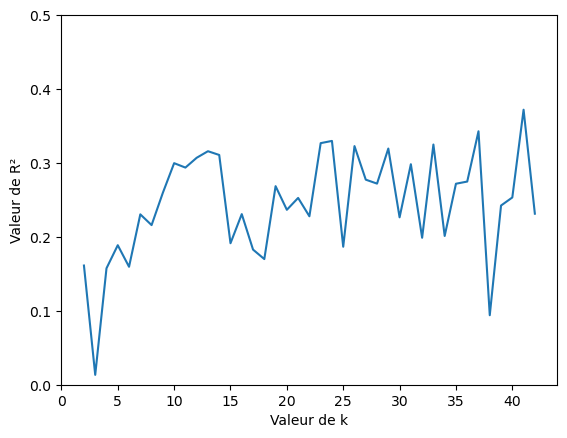

In [15]:
# courbé des R² en fonction des k variables retenues
plt.plot(range(X_encod.shape[1],1,-1), scores)
plt.ylim(0,0.5)
plt.xlabel('Valeur de k')
plt.ylabel('Valeur de R²')

In [16]:
# détermination des k variables à retenir pour maximiser le score
k = range(X_encod.shape[1],1,-1)[np.argmax(scores)]
k

41

### Création dataframe avec les k variables

In [17]:
selector = SelectKBest(f_regression, k=k)

# echantillon avec les k variables selectionnées
X_selector = selector.fit_transform(X_encod, y)

# df avec les k variables selectionnées et les noms de colonnes associées
X_selector = X_encod[X_encod.columns[selector.get_support()]]
X_selector.head()

,NombreUtilisations,NombreBatiments,NombreEtages,SurfacePlancherTotal,DOWNTOWN,NORTHEAST,EAST,LAKE UNION,GREATER DUWAMISH,BALLARD,NORTHWEST,MAGNOLIA / QUEEN ANNE,CENTRAL,SOUTHWEST,SOUTHEAST,NORTH,DELRIDGE,DELRIDGE NEIGHBORHOODS,Hotel,Other,Mixed Use Property,University,Small- and Mid-Sized Office,Self-Storage Facility,Warehouse,K-12 School,Large Office,Senior Care Community,Medical Office,Retail Store,Hospital,Residence Hall,Distribution Center,Worship Facility,Supermarket / Grocery Store,Laboratory,Refrigerated Warehouse,Low-Rise Multifamily,Restaurant,Compliant,Non-Compliant
0,1,1.0,12,88434,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,1.0,11,103566,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1.0,41,956110,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1.0,10,61320,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,1.0,18,175580,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variables gardées avec leur coefficient

In [18]:
coef = selectk_scores[X_selector.columns]
coef

NombreUtilisations               1.370517
NombreBatiments                 14.785760
NombreEtages                     4.535395
SurfacePlancherTotal             1.654312
DOWNTOWN                         2.440825
NORTHEAST                        0.484581
EAST                             0.103210
LAKE UNION                       0.050244
GREATER DUWAMISH                 3.930972
BALLARD                         25.909749
NORTHWEST                       23.801881
MAGNOLIA / QUEEN ANNE            0.950958
CENTRAL                          0.224609
SOUTHWEST                        0.032911
SOUTHEAST                        0.644594
NORTH                            1.051353
DELRIDGE                         1.145312
DELRIDGE NEIGHBORHOODS          18.141684
Hotel                            7.970384
Other                           71.479453
Mixed Use Property              10.327710
University                       0.451035
Small- and Mid-Sized Office    108.347766
Self-Storage Facility           32

### Création de variables polynomiales pour les variables quantitatives

In [19]:
'''# variables numériques de data
data_var_num = data.select_dtypes(exclude='object').columns


# variables numériques de data présentes dans les variables sélectionnées
data_var_num_pres = data_var_num[data_var_num.isin(X_selector.columns)]

X_selector_categ = X_selector.drop(columns=data_var_num_pres)

X_selector_num = X_selector[data_var_num_pres]
X_selector_num.head()

# creation d'un df avec des variables polynomiales de degré 2
poly = PolynomialFeatures(2)

poly.fit_transform(X_selector_num)

poly.get_feature_names_out()

X_selector_num_poly = pd.DataFrame(poly.fit_transform(X_selector_num),
                                   columns=poly.get_feature_names_out(), 
                                  index=X_selector.index)
X_selector_num_poly

# concaténation du df variables numériques poly et df categ encodées
X_selector = pd.concat((X_selector_num_poly, X_selector_categ), axis=1)
X_selector'''

"# variables numériques de data\ndata_var_num = data.select_dtypes(exclude='object').columns\n\n\n# variables numériques de data présentes dans les variables sélectionnées\ndata_var_num_pres = data_var_num[data_var_num.isin(X_selector.columns)]\n\nX_selector_categ = X_selector.drop(columns=data_var_num_pres)\n\nX_selector_num = X_selector[data_var_num_pres]\nX_selector_num.head()\n\n# creation d'un df avec des variables polynomiales de degré 2\npoly = PolynomialFeatures(2)\n\npoly.fit_transform(X_selector_num)\n\npoly.get_feature_names_out()\n\nX_selector_num_poly = pd.DataFrame(poly.fit_transform(X_selector_num),\n                                   columns=poly.get_feature_names_out(), \n                                  index=X_selector.index)\nX_selector_num_poly\n\n# concaténation du df variables numériques poly et df categ encodées\nX_selector = pd.concat((X_selector_num_poly, X_selector_categ), axis=1)\nX_selector"

La création de variables polynomiales n'a pas été concluante, créer un modèle non prédictif.

### Création du modèle avec les k variables

In [20]:
# creation des jeux d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.3110479175024662

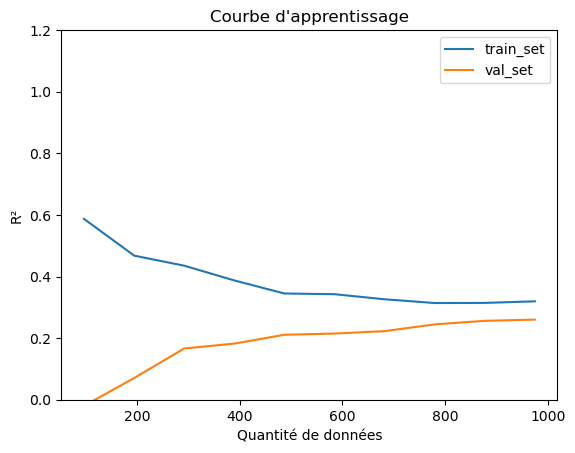

In [21]:
# courbe d'apprentissage du meilleur estimateur
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title(f"Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

### Test du Ridge, Lasso et ElasticNet

In [22]:
# Ridge
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

ridge = Ridge()

ridge.fit(X_train, y_train)

ridge.score(X_test, y_test)

0.31997393023262255

In [23]:
# Lasso
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

lasso = Lasso()

lasso.fit(X_train, y_train)

lasso.score(X_test, y_test)

-0.00213833864755264

In [24]:
# ElasticNet
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

elastic_net = ElasticNet()

elastic_net.fit(X_train, y_train)

elastic_net.score(X_test, y_test)

-0.002009795520965252

Le Ridge obtient le meilleur R², meilleur que la régression linéaire simple.

### Courbe d'apprentissage du Ridge

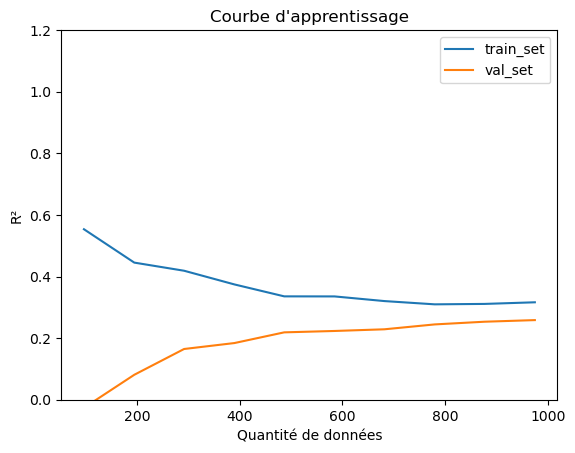

In [25]:
# courbe d'apprentissage du meilleur estimateur
N, train_score, val_score = learning_curve(ridge, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title(f"Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

### Optimisation du Ridge

In [26]:
ridge = Ridge()

param_grid = {
    'alpha' : [0.01, 0.1, 1.0, 10.0], # controle la force de régularisation
    'tol' : [1e-4, 1e-3, 1e-2],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], # critère de convergence pour déterminer les coefs des variables
    'positive' : [True, False] # force les coefficients positifs, ou non
}

In [27]:
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0],
                         'positive': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [31]:
grid.best_estimator_.score(X_test, y_test)

0.31297311884928913

In [32]:
grid.best_score_

0.2603049705388249

L'algorithme optimisé à un score moins bon que l'algorithme de base, on garde donc celui de base.

### Tentative d'utilisation d'autres algorithmes

In [33]:
# RandomForest
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

RandomForest = RandomForestRegressor()

RandomForest.fit(X_train, y_train)

RandomForest.score(X_test, y_test)

0.2710191983811514

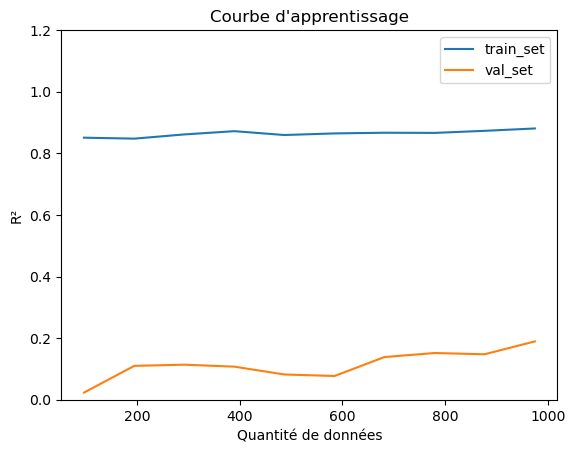

In [34]:
# courbe d'apprentissage du meilleur estimateur
N, train_score, val_score = learning_curve(RandomForest, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title(f"Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

Le modèle est en surapprentissage, nous allons régler les hyperparamètres afin de remédier à cela.

In [35]:
# AdaBoost
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

AdaBoost = AdaBoostRegressor()

AdaBoost.fit(X_train, y_train)

AdaBoost.score(X_test, y_test)

-0.47405585548914053

RandomForestRegressor semble très intéressant.  
Je vais maintenant tenter de l'optimiser.

### Optimisation RandomForest

In [36]:
RandomForest = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20],  # Profondeur maximale des arbres (None signifie aucune limite)
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis dans un nœud feuille
    'max_features': ['auto', 'sqrt'],  # Nombre de caractéristiques à considérer lors de la recherche de la meilleure division
    'bootstrap': [True, False]  # Si les échantillons sont tirés avec remplacement (bootstrapping) lors de la construction des arbres
}

In [37]:
grid = GridSearchCV(estimator=RandomForest, param_grid=param_grid, cv=5, verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [38]:
best_estimator = grid.best_estimator_
best_estimator

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=2)

In [39]:
grid.best_score_

0.2776804194234413

In [40]:
best_params = grid.best_params_
best_params

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [41]:
cv_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
307,0.176900,0.004426,0.012790,9.801951e-04,False,20,sqrt,2,2,100,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.265206,0.232498,0.259803,0.342248,0.288647,0.277680,0.036894,1
143,0.472324,0.035988,0.026186,1.465595e-03,True,20,sqrt,1,10,200,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.251735,0.233237,0.264035,0.352859,0.274853,0.275344,0.041151,2
304,0.179096,0.005112,0.012991,1.974129e-06,False,20,sqrt,1,10,100,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.225013,0.248648,0.264567,0.357590,0.276538,0.274471,0.044998,3
314,0.345199,0.021695,0.025186,3.543004e-03,False,20,sqrt,2,10,200,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.244161,0.236394,0.263873,0.336861,0.286451,0.273548,0.036091,4
204,0.087151,0.002033,0.007792,3.981512e-04,False,None,sqrt,2,10,50,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.252681,0.237271,0.246001,0.336908,0.286725,0.271917,0.036565,5
35,0.415562,0.007525,0.023588,7.985539e-04,True,None,sqrt,1,10,200,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.244250,0.227463,0.270553,0.337914,0.279342,0.271905,0.037827,6
305,0.364200,0.004370,0.024379,1.020408e-03,False,20,sqrt,1,10,200,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.240283,0.246717,0.248946,0.345077,0.275942,0.271393,0.038809,7
146,0.413959,0.025900,0.022790,7.481756e-04,True,20,sqrt,2,2,200,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.259264,0.230955,0.252391,0.331752,0.282563,0.271385,0.034384,8
41,0.407370,0.010894,0.023794,3.982358e-04,True,None,sqrt,2,5,200,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.251487,0.227527,0.263330,0.328571,0.285037,0.271191,0.034178,9
43,0.200685,0.015614,0.013791,1.720015e-03,True,None,sqrt,2,10,100,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.246665,0.229523,0.262511,0.323169,0.293491,0.271072,0.033502,10


### Modèle définitif avec les meilleurs paramètres de la grille

In [42]:
# RandomForest
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

RandomForest = RandomForestRegressor(bootstrap=False, max_depth=15, max_features='sqrt',
                      min_samples_split=20, n_estimators=40)

RandomForest.fit(X_train, y_train)

RandomForest.score(X_test, y_test)

0.3611036688266783

Le score est moins bon que le modèle de base, mais il a été testé sur plus de données avec la cross validation est donc suceptible de mieux généraliser.

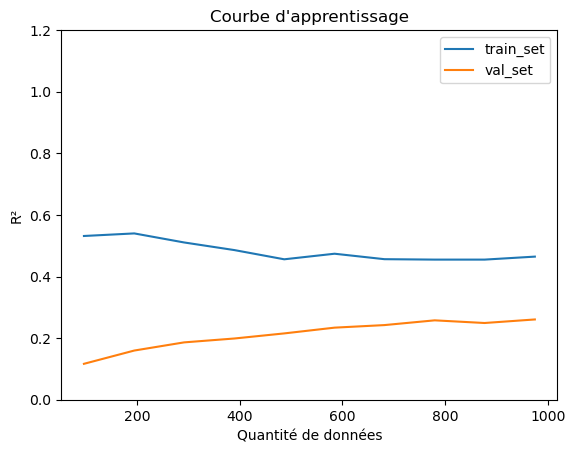

In [43]:
# courbe d'apprentissage du meilleur estimateur
N, train_score, val_score = learning_curve(RandomForest, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title(f"Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

### KNN et SVM

In [44]:
# KNN
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

-0.30944233534634025

In [45]:
# SVR
X_train, X_test, y_train, y_test = train_test_split(X_selector, y, test_size=0.2, random_state=1)

svr = LinearSVR()

svr.fit(X_train, y_train)

svr.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-0.3645841988739482

Ces 2 modèles ne sont pas concluants, les meilleurs modèles sont le Ridge et la RandomForest, avec la RandomForest en première place.